In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [25]:
folder = "./datasets_models/"
df = pd.read_csv(folder + "data.csv")

In [26]:
df['data_lectura'] = pd.to_datetime(df['data_lectura'])
df = df.dropna().reset_index(drop=True)
# df['anio'] = df['data_lectura'].dt.year
# df['mes'] = df['data_lectura'].dt.month
# df['dia'] = df['data_lectura'].dt.day
# df['dia_semana'] = df['data_lectura'].dt.dayofweek

In [27]:
df

,comarca,data_lectura,temp,precip,hume,temp_anterior,precip_anterior,hume_anterior
0,Vallès Oriental,2009-01-02,7.416667,0.008333,91.291667,8.059722,0.000000,86.152778
1,Vallès Oriental,2009-01-03,5.665278,0.000000,92.083333,7.416667,0.008333,91.291667
2,Vallès Oriental,2009-01-04,4.345833,0.002083,81.638889,5.665278,0.000000,92.083333
3,Vallès Oriental,2009-01-05,3.138824,0.002083,76.811765,4.345833,0.002083,81.638889
4,Vallès Oriental,2009-01-06,1.035417,0.450000,92.875000,3.138824,0.002083,76.811765
...,...,...,...,...,...,...,...,...
37088,Vallès Occidental,2023-07-05,21.832143,0.007143,84.946429,23.057962,0.000633,78.019108
37089,Vallès Occidental,2023-07-06,22.760119,0.011905,76.791667,21.832143,0.007143,84.946429
37090,Vallès Occidental,2023-07-07,23.723214,0.000000,68.672619,22.760119,0.011905,76.791667
37091,Vallès Occidental,2023-07-08,25.869048,0.000000,61.208333,23.723214,0.000000,68.672619


In [29]:
dicc_comarques = {}

# Itera sobre las comarcas únicas en el dataframe
for comarca in df['comarca'].unique():
    # Filtra las filas correspondientes a la comarca actual
    df_comarca = df[df['comarca'] == comarca].copy()
    
    # Elimina la columna "comarca" del dataframe resultante
    df_comarca.drop('comarca', axis=1, inplace=True)
    
    # Almacena el dataframe en el diccionario
    dicc_comarques[comarca] = df_comarca.reset_index(drop=True)

In [30]:
comarques_bcn = list(dicc_comarques.keys())
comarques_bcn

['Vallès Oriental',
 'Alt Penedès',
 'Baix Llobregat',
 'Barcelonès',
 'Garraf',
 'Maresme',
 'Vallès Occidental']

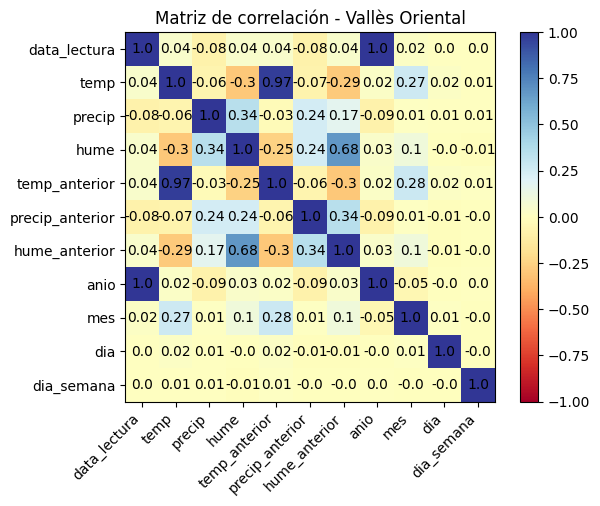

In [65]:
comarca = 0
matriz_correlacion = dicc_comarques[comarques_bcn[comarca]].corr()

fig, ax = plt.subplots()
im = ax.imshow(matriz_correlacion, cmap='RdYlBu', vmin=-1, vmax=1,)
cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(range(len(matriz_correlacion.columns)))
ax.set_yticks(range(len(matriz_correlacion.columns)))
ax.set_xticklabels(matriz_correlacion.columns)
ax.set_yticklabels(matriz_correlacion.columns)

plt.xticks(rotation=45, ha='right')

for i in range(len(matriz_correlacion.columns)):
    for j in range(len(matriz_correlacion.columns)):
        text = ax.text(j, i, round(matriz_correlacion.iloc[i, j], 2),
                       ha="center", va="center", color="black")

ax.set_title(f"Matriz de correlación - {comarques_bcn[comarca]}")

plt.show()

In [68]:
comarca = 0
x = dicc_comarques[comarques_bcn[comarca]].drop(["precip", "data_lectura"], axis=1)
y = dicc_comarques[comarques_bcn[comarca]].precip

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=47)

In [74]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4239 entries, 881 to 5255
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temp             4239 non-null   float64
 1   hume             4239 non-null   float64
 2   temp_anterior    4239 non-null   float64
 3   precip_anterior  4239 non-null   float64
 4   hume_anterior    4239 non-null   float64
dtypes: float64(5)
memory usage: 198.7 KB


In [69]:
poly_features = PolynomialFeatures(degree=2)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

model = LinearRegression()
model.fit(x_train_poly, y_train)

LinearRegression()

In [49]:
dicc_comarques[comarques_bcn[comarca]].dropna()['data_lectura']
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1060 entries, 4378 to 3732
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temp             1060 non-null   float64
 1   hume             1060 non-null   float64
 2   temp_anterior    1060 non-null   float64
 3   precip_anterior  1060 non-null   float64
 4   hume_anterior    1060 non-null   float64
dtypes: float64(5)
memory usage: 49.7 KB


In [70]:
y_pred = model.predict(x_test_poly)

# dates = df.loc[x_test.index, 'data_lectura']

# x_values = pd.date_range(start=x_test.min(), end=x_test.max(), periods=100)
# x_values_poly = poly_features.transform(x_values.to_frame())
# y_values_pred = model.predict(x_values_poly)

# fig, ax = plt.subplots()
# ax.scatter(dates, y_test, color='b', label='Valores Reales')
# ax.plot(x_values, y_values_pred, color='r', label='Línea Polinomial')
# ax.set_xlabel('Fecha')
# ax.set_ylabel('Precipitación')
# plt.xticks(rotation=45)
# ax.legend()
# plt.show()


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)
print("R2 Score:", r2)

Error cuadrático medio (MSE): 0.022331369137510357
R2 Score: 0.2470406235963052
